In [89]:
import lammps_logfile
import matplotlib.pyplot as plt


def anisotropic_swelling(lx0, ly0, lz0, avol0, pka, path):
    """
    Plots the size deformation before and after NPT annealing.

    Parameters:
    lx0, ly0, lz0 : float
        Original simulation box size in x, y, z directions respectively.
    avol0 : float
        Original atomic volume.
    pka : list
        List of PKA numbers.
    path : str
        File path to the directory containing the LAMMPS log files.

    Returns:
    None
    """

    # Set up the plot parameters
    plt.rcParams['axes.linewidth'] = 1
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams["font.family"] = "arial"
    fig, axs = plt.subplots(1, figsize=(6/2.54, 4.6/2.54), sharey=True)
    plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99, wspace=0.05, hspace=0.1)

    # Initialize lists to hold deformation data
    avol, lx, ly, lz = [], [], [], []
    lx1, ly1, lz1 = [], [], []

    # Read data from LAMMPS log files
    for i in pka:
        fn = f'{path}lammps.anneal1_{i}'
        log = File(fn)
        avol.append(log.get("v_avol")[-1] / avol0)
        lx.append((log.get("Lx")[-1] / lx0)*100-100)
        ly.append((log.get("Ly")[-1] / ly0)*100-100)
        lz.append((log.get("Lz")[-1] / lz0)*100-100)
        lx1.append((log.get("Lx")[0] / lx0)*100-100)
        ly1.append((log.get("Ly")[0] / ly0)*100-100)
        lz1.append((log.get("Lz")[0] / lz0)*100-100)
    # Plot the data
    axs.plot(pka, lx, marker="o", color='royalblue', linestyle='--', markersize=5, label='x')
    axs.plot(pka, ly, marker="o", color='green', linestyle='--', markersize=5, label='y')
    axs.plot(pka, lz, marker="o", color='orangered', linestyle='--', markersize=5, label='z')
    axs.plot(pka, lx1, color='royalblue', marker="o", markerfacecolor='white', linestyle='', markersize=5)
    axs.plot(pka, ly1, color='green', marker="o", markerfacecolor='white', linestyle='', markersize=5)
    axs.plot(pka, lz1, color='orangered', marker="o", markerfacecolor='white', linestyle='', markersize=5)

    # Add arrows to indicate deformation direction
    #for i in range(len(pka)):
        #axs.annotate('', xy=(pka[i], lz[i]), xytext=(pka[i], lz1[i]), arrowprops=dict(color='red', arrowstyle='->', lw=1, ls='-'))

    # Set labels and legend
    axs.set_ylabel('Deformation Fraction (%)', fontsize=10)
    axs.set_xlabel('PKA numbers', fontsize=10)
    axs.tick_params(width=1, length=3, labelsize=10)
    axs.legend(fontsize=10, frameon=False)
    # Set y-axis limits
    #axs.set_ylim([-1, 1])  # Assuming deformation fraction ranges from -0.2% to 0.2%
    # Display the plot
    plt.show()
    #plt.plot(pka,avol)
    return lx,ly,lz,avol
# Example usage:
#anisotropic_swelling(lx0, ly0, lz0, avol0, pka, path)


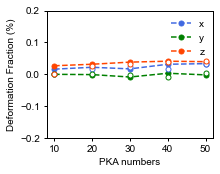

In [83]:
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/cascade_anneal/anisotropic/anneal_log/010/anneal_log/'
avol0=11.0838
lx0=145.8696738    
ly0=296.9767609   
lz0=141.4800266
pka=[i+10 for i in range(0,50,10)]
lx,ly,lz,avol=anisotropic_swelling(lx0, ly0, lz0, avol0, pka, path)
#plt.plot(pka,avol)

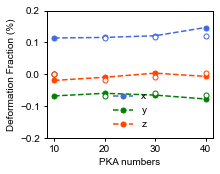

In [78]:
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/cascade_anneal/anisotropic/anneal_log/100/anneal_log/'
avol0=11.0838
lx0=291.4543455    
ly0=148.5655268     
lz0=141.5348142 
pka=[i+10 for i in range(0,40,10)]
lx,ly,lz,avol=anisotropic_swelling(lx0, ly0, lz0, avol0, pka, path)

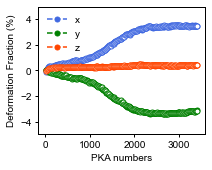

In [80]:
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/cascade_anneal/out/'
avol0=11.08054726
lx0=97.2529    
ly0=98.9999    
lz0=94.3839 
pka=[i for i in range(10,3420,20)]
lx,ly,lz,avol=anisotropic_swelling(lx0, ly0, lz0, avol0, pka, path)

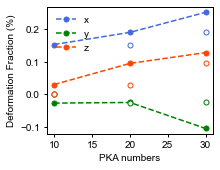

In [99]:
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/cascade_anneal/anisotropic/anneal_log/small_box/100/anneal_log/'
avol0=11.08054726
lx0=97.14422072   
ly0=99.03631599   
lz0=94.34952293
pka=[i+10 for i in range(0,30,10)]
lx,ly,lz,avol=anisotropic_swelling(lx0, ly0, lz0, avol0, pka, path)
#plt.plot(pka,avol)

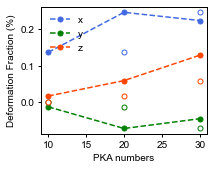

In [98]:
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/cascade_anneal/anisotropic/anneal_log/small_box/010/anneal_log/'
avol0=11.08054726
lx0=97.14422072   
ly0=99.03631599   
lz0=94.34952293
pka=[i+10 for i in range(0,30,10)]
lx,ly,lz,avol=anisotropic_swelling(lx0, ly0, lz0, avol0, pka, path)
#plt.plot(pka,avol)